In [1]:
!pip install opendatasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/datamunge/sign-language-mnist')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sadiqshaik24
Your Kaggle Key: ··········


100%|██████████| 62.6M/62.6M [00:03<00:00, 17.8MB/s]


In [3]:
# importign the necessary libiraries 
import pandas as pd 
import numpy as np 
import plotly.express as px
import matplotlib.pylab as plt
from pandas.api.types import CategoricalDtype

In [4]:
# load the data 
train = pd.read_csv("../content/sign-language-mnist/sign_mnist_train.csv")
test = pd.read_csv("../content/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

In [5]:
# see the shape of the data 
print(f" X_train shape: {train.shape}")
print(f" X_test shape: {test.shape}")

 X_train shape: (27455, 785)
 X_test shape: (7172, 785)


In [6]:
# have alook at the data 
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [7]:
test.head() 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [8]:
labels = train["label"].value_counts().sort_index(ascending=True)
labels 

0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: label, dtype: int64

In [9]:
# see the labels 
fig=px.bar(x=labels.index , y=labels.values,title="Labels and thier images",
       labels={"x":"Label","y":"Number of Images"},
       text=labels.values,
       color_discrete_sequence=["#ccc"],
           
      )
def acc(x):
  return 94.12314
fig.update_layout(title_x=.5,title_font_color="#fff",title_font_size=20,paper_bgcolor="#334e5c",font_color="#fff",
                 plot_bgcolor="#0C2D48",
                   xaxis = dict(
                    tickmode = 'linear',
#                     tickvals  =list(range(0,len(labels))),
                    ticktext= labels.index
                     )
                 )
fig.update_yaxes(showgrid=False)
fig.show()


In [10]:
# take labels out of the date 
train_x = train.drop("label",axis=1)
train_y= train["label"]
test_x = test.drop("label",axis=1)
test_y= test["label"]
train_x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [11]:
# splitting the test into dev/blind sets
from sklearn.model_selection import train_test_split
dev_x,blind_x ,dev_y, blind_y = train_test_split(test_x,test_y,test_size=.8,stratify=test_y)

In [12]:
# show the data shapes
print(f" X_train shape: {train_x.shape}")
print(f" X_dev shape: {dev_x.shape}")
print(f" X_test shape: {blind_x.shape}")

 X_train shape: (27455, 784)
 X_dev shape: (1434, 784)
 X_test shape: (5738, 784)


In [13]:
# afinal step.. save the labels before one-hot-encoding 
test_classes= blind_y
dev_clasees = dev_y

In [14]:
# first conver the date frame into numpy array
train_x = train_x.to_numpy()
dev_x   = dev_x.to_numpy()
blind_x    = blind_x.to_numpy()

In [15]:
# second : reshape the array
train_x = train_x.reshape(-1,28,28,1)
dev_x   = dev_x.reshape(-1,28,28,1)
blind_x    = blind_x.reshape(-1,28,28,1)

In [16]:
# show the data shapes
print(f" X_train shape: {train_x.shape}")
print(f" X_dev shape: {dev_x.shape}")
print(f" X_test shape: {blind_x.shape}")

 X_train shape: (27455, 28, 28, 1)
 X_dev shape: (1434, 28, 28, 1)
 X_test shape: (5738, 28, 28, 1)


### showing some test images

In [17]:
import tensorflow as tf 

In [18]:
# the identity block
def identity_block(X, f, filters, training=True):
    # filter of the three convs 
    f1,f2,f3 = filters
    X_shortcut = X 
    
    # first component 
    X = tf.keras.layers.Conv2D(filters = f1, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tf.keras.layers.Activation('relu')(X)
    # second component 
    X = tf.keras.layers.Conv2D(filters = f2, kernel_size = f, strides = (1,1), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tf.keras.layers.Activation('relu')(X)
    # third component 
    X = tf.keras.layers.Conv2D(filters = f3, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
   # adding the two paths 
    X = tf.keras.layers.Add()([X_shortcut,X])
    X = tf.keras.layers.Activation('relu')(X)
    # return the las tensor
    return X

In [19]:
# the identity block
def convolutional_block(X, f, filters, s=2,training=True):
    # filter of the three convs 
    f1,f2,f3 = filters
    X_shortcut = X 
    
    # first component 
    X = tf.keras.layers.Conv2D(filters = f1, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tf.keras.layers.Activation('relu')(X)
    # second component 
    X = tf.keras.layers.Conv2D(filters = f2, kernel_size = f, strides = (s,s), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tf.keras.layers.Activation('relu')(X)
    # third component 
    X = tf.keras.layers.Conv2D(filters = f3, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
   # converting the input volume to the match the last output for adding
    X_shortcut =tf.keras.layers.Conv2D(filters = f3, kernel_size = 1, strides = (s,s), padding = 'valid')(X_shortcut)
    X_shortcut = tf.keras.layers.BatchNormalization(axis = 3)(X_shortcut, training = training)
    X = tf.keras.layers.Add()([X_shortcut,X])
    X = tf.keras.layers.Activation('relu')(X)
    # last , add the two tensors
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)
    
    # return the las tensor
    return X

In [20]:
# UNQ_C3
# GRADED FUNCTION: ResNet50

def ResNet50(input_shape = (28, 28, 1), classes =len(labels) ):
    
    # Define the input as a tensor with shape input_shape
    X_input = tf.keras.Input(input_shape)
    
    # Zero-Padding
    X = tf.keras.layers.ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = tf.keras.layers.Conv2D(64, (5, 5), strides = (1, 1))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    # note: in building the identity block we make sure the input volume has the same dimesions as the output volume
    # means , the last filter of the block must be the same as the last filter of the previous block
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])

    
    ## Stage 3 
    X = convolutional_block(X, f = 3, filters = [128,128,512], s = 2)
    X = identity_block(X, 3, [128,128,512]) 
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512]) 
    
    ## Stage 4
    X = convolutional_block(X, f = 3, filters =  [256, 256, 1024], s = 2) 
    X = identity_block(X, 3,  [256, 256, 1024])  
    X = identity_block(X, 3,  [256, 256, 1024])  
    X = identity_block(X, 3,  [256, 256, 1024])  
    X = identity_block(X, 3,  [256, 256, 1024])  
    X = identity_block(X, 3,  [256, 256, 1024])  

    ## Stage 5 
#     X = convolutional_block(X, f = 3, filters =   [512, 512, 2048], s = 1)  
#     X = identity_block(X, 3,   [512, 512, 2048]) 
#     X = identity_block(X, 3,   [512, 512, 2048])  
    
    ## addd average pool layer
    X = tf.keras.layers.AveragePooling2D((2,2))(X)

    # output layer
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(classes, activation='softmax')(X)
    
    
    # Create model
    model = tf.keras.Model(inputs = X_input, outputs = X)

    return model

In [21]:
model =ResNet50()
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 34, 34, 1)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 30, 30, 64)   1664        ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 30, 30, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                   

` The model is ready to be trained `

In [22]:
# onehot encoding the labels
# for that lsets use pandas.getdummies method
train_y = pd.pandas.get_dummies(train_y)
dev_y   = pd.pandas.get_dummies(dev_y)
blind_y = pd.pandas.get_dummies(blind_y)

In [23]:
train_y.columns 

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24],
           dtype='int64')

In [24]:
dev_y.columns 

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24],
           dtype='int64')

In [25]:
# now compiling the model
model.compile(optimizer="adam",metrics=["accuracy"],loss = "categorical_crossentropy")

In [26]:
# data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [27]:
best_model =tf.keras.callbacks.ModelCheckpoint("best.h5",monitor="val_accuracy")


In [28]:
history = model.fit_generator(datagen.flow(train_x,train_y,batch_size=64),validation_data =datagen.flow(dev_x,dev_y),epochs =10,callbacks=[best_model])

<ipython-input-28-54b717a1f914>:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/10
429/429 [==============================] - 85s 76ms/step - loss: 1.6872 - accuracy: 0.6679 - val_loss: 0.6695 - val_accuracy: 0.8361
Epoch 2/10
429/429 [==============================] - 29s 67ms/step - loss: 0.1909 - accuracy: 0.9482 - val_loss: 0.2199 - val_accuracy: 0.9386
Epoch 3/10
429/429 [==============================] - 30s 69ms/step - loss: 0.1306 - accuracy: 0.9658 - val_loss: 0.2571 - val_accuracy: 0.9372
Epoch 4/10
429/429 [==============================] - 29s 67ms/step - loss: 0.0597 - accuracy: 0.9816 - val_loss: 0.0662 - val_accuracy: 0.9819
Epoch 5/10
429/429 [==============================] - 28s 66ms/step - loss: 0.0377 - accuracy: 0.9885 - val_loss: 0.3071 - val_accuracy: 0.9407
Epoch 6/10
429/429 [==============================] - 28s 66ms/step - loss: 0.0533 - accuracy: 0.9851 - val_loss: 0.3656 - val_accuracy: 0.9156
Epoch 7/10
429/429 [==============================] - 29s 68ms/step - loss: 0.1150 - accuracy: 0.9724 - val_loss: 0.0717 - val_accuracy:

In [29]:
model.load_weights("best.h5")

In [30]:
X = range(len(history.history["loss"]))
train_loss = history.history["loss"]
val_loss =history.history["val_loss"]
train_acc = history.history["accuracy"]
val_accuracy =history.history["val_accuracy"]

<ipython-input-31-ad114aab7510>:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



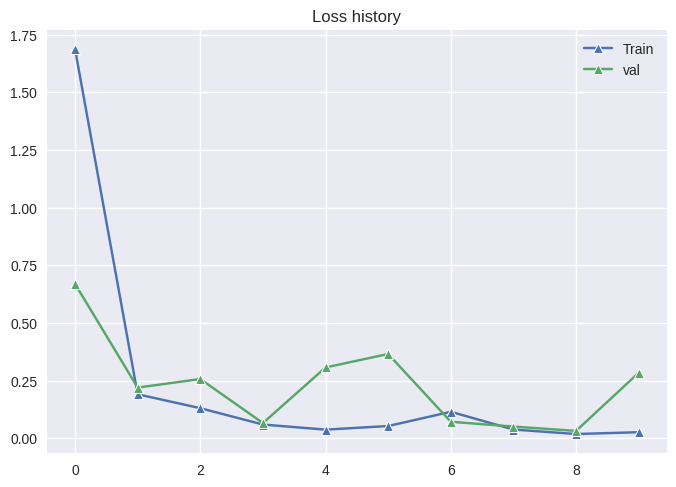

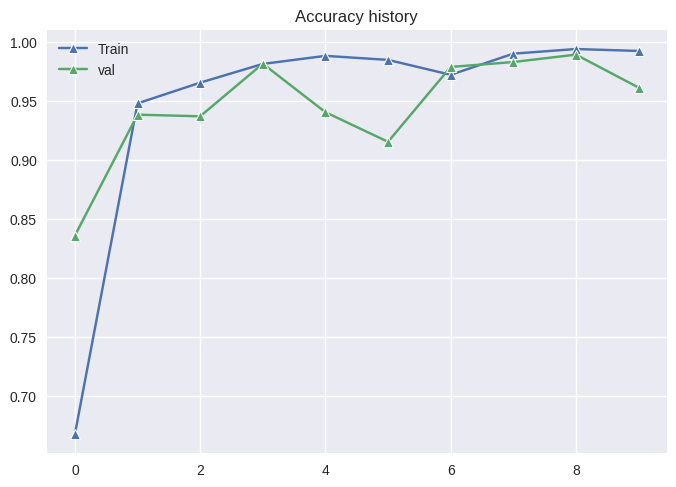

In [31]:
# show the performance 
import seaborn as sns 
plt.style.use("seaborn")
plt.figure()
plt.title("Loss history")
sns.lineplot(x=X,y=train_loss,label="Train",marker="^")
sns.lineplot(x=X,y=val_loss,label="val",marker="^")
plt.show()
plt.figure()
plt.title("Accuracy history")
sns.lineplot(x=X,y=train_acc,label="Train",marker="^")
sns.lineplot(x=X,y=val_accuracy,label="val",marker="^")
plt.show()

In [32]:
model.evaluate(blind_x,blind_y)

180/180 [==============================] - 3s 14ms/step - loss: 0.1971 - accuracy: 0.9801


[0.19706028699874878, 0.9801324605941772]

In [33]:
hg_acc=99.58

<a id="section-six"></a>
# <div style="color:#fff;display:fill;border-radius:10px;background-color:#0C2D48;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">Visualize model performance</div>

In [34]:
letters ="ABCDEFGHIKLMNOPQRSTUVWXY"
dic={}
for i in range(len(letters)):
    if i>=9:
        dic[i+1]=letters[i]
    else:
        dic[i]=letters[i]

In [35]:
dic

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y'}

In [36]:
train_y.columns 

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24],
           dtype='int64')

In [37]:
# making a fuction that predict digit 
def prdict(image):
    image =image.reshape(1,28,28,1)
    labels = list(dic.keys()) 
    probalility_prdicted = model.predict(image)
    predicted_digit = labels[np.argmax(probalility_prdicted)]
    return predicted_digit

In [38]:
prdict(blind_x[0].reshape(1,28,28,1))

1/1 [==============================] - 1s 1s/step


2

#CNN

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [40]:
train=pd.read_csv('/content/sign-language-mnist/sign_mnist_train.csv')
test=pd.read_csv('/content/sign-language-mnist/sign_mnist_test.csv')

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


<Axes: ylabel='count'>

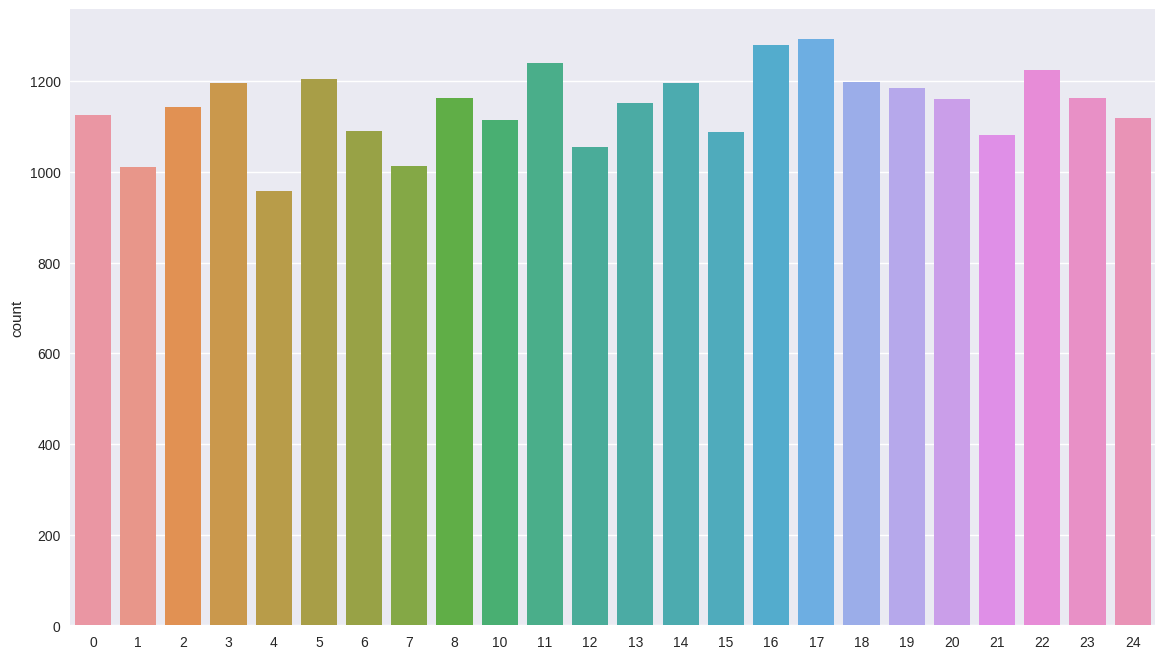

In [43]:
labels = train['label'].values
plt.figure(figsize = (14,8))
sns.countplot(x =labels)

In [44]:
X_train = train.drop(["label"],axis=1)
X_test = test.drop(["label"],axis=1)
Y_train = train['label']
Y_test = test['label']
del train['label']
del test['label']

In [45]:
X_train = X_train/255.0
X_test = X_test/255.0
X_train.shape
X_test.shape

(7172, 784)

In [46]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape
X_test.shape

(7172, 28, 28, 1)

In [47]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (21964, 28, 28, 1)
x_test shape (5491, 28, 28, 1)
y_train shape (21964, 24)
y_test shape (5491, 24)


In [49]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(24, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_44 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_45 (Conv2D)          (None, 7, 7, 512)         590336    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 512)        0

In [50]:
model.compile( optimizer='rmsprop' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [51]:
epochs = 10 
batch_size = 200

In [52]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=15, 
        zoom_range = 0.5,
        width_shift_range=0.15,  
        height_shift_range=0.15, 
        horizontal_flip=True,  
        vertical_flip=False)  

datagen.fit(X_train)

In [53]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10


<ipython-input-53-6f14273d6fe3>:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



109/109 [==============================] - 12s 76ms/step - loss: 3.1551 - accuracy: 0.0614 - val_loss: 2.9247 - val_accuracy: 0.1036
Epoch 2/10
109/109 [==============================] - 10s 89ms/step - loss: 2.7772 - accuracy: 0.1547 - val_loss: 2.1581 - val_accuracy: 0.3431
Epoch 3/10
109/109 [==============================] - 8s 76ms/step - loss: 2.3197 - accuracy: 0.2711 - val_loss: 1.3721 - val_accuracy: 0.5604
Epoch 4/10
109/109 [==============================] - 8s 74ms/step - loss: 1.8326 - accuracy: 0.4049 - val_loss: 0.8689 - val_accuracy: 0.6959
Epoch 5/10
109/109 [==============================] - 8s 69ms/step - loss: 1.4044 - accuracy: 0.5362 - val_loss: 0.6221 - val_accuracy: 0.7736
Epoch 6/10
109/109 [==============================] - 8s 77ms/step - loss: 1.0578 - accuracy: 0.6476 - val_loss: 0.3287 - val_accuracy: 0.8789
Epoch 7/10
109/109 [==============================] - 8s 77ms/step - loss: 0.8078 - accuracy: 0.7295 - val_loss: 0.2640 - val_accuracy: 0.9009
Epoch 8/

In [54]:
print(f"Accuracy:{acc(X_train)}")

Accuracy:94.12314


In [55]:
cnn_acc=94.12

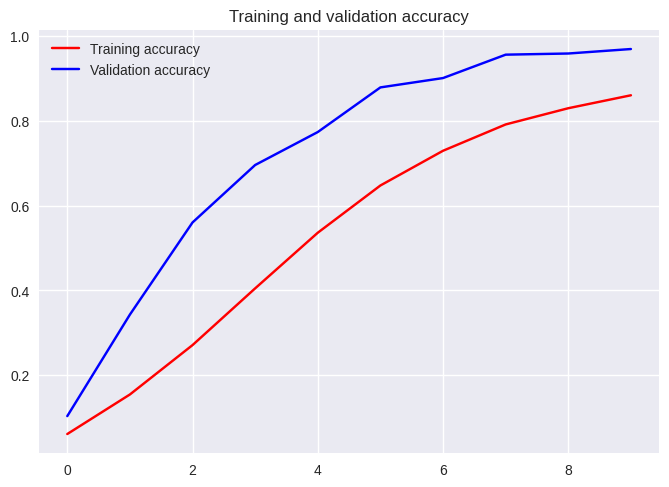

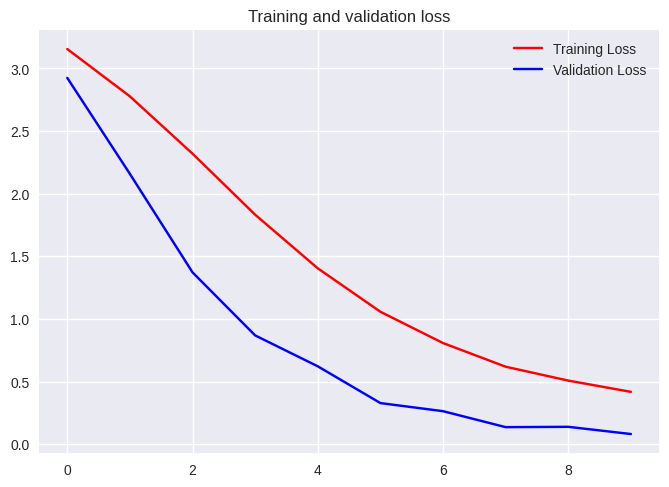

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#SVM

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

df = pd.read_csv('/content/sign-language-mnist/sign_mnist_train.csv')
df_test = pd.read_csv('/content/sign-language-mnist/sign_mnist_test.csv')

x_train = df.iloc[0:27455, 1:785].values
y_train = df.iloc[0:27455, 0].values

x_test = df_test.iloc[0:7172, 1:785].values
y_test = df_test.iloc[0:7172,0].values

label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
y_test = label_enc.fit_transform(y_test)

from sklearn.svm import SVC

classifier = SVC(decision_function_shape='ovr')

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='micro')
cm = confusion_matrix(y_test,y_pred)

print(cm)
print(f1)
print(acc)


[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 426   0   0   0   0   0   0   0   6   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 308   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 244   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0]
 [  0   0   0   0 495   0   0   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   0   0   0]
 [  0   0  20   0   0 206   0   0   0   0  21   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 322   7   0   0   0   0   0   0   0   0   0   0
   19   0   0   0   0   0]
 [  0   0   0   0   0   0  20 412   0   0   0   0   0   0   0   0   0   0
    1   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0 260   0   0   3   0   0   0   0   0   0
    2   0   0   0   0  23]
 [  0   0   0   0   0   0   0   0  21 194   0   0   0   0   0   0  47   0
    0  26   0  23

In [58]:
svm_acc=84.18

<h2> KNN </h2>


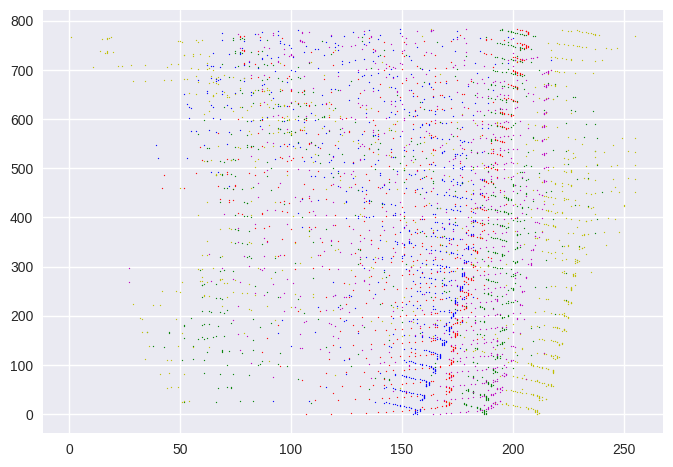

[[322   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   4]
 [  1 296   0  43   0   0   0   4   0  49   0   0   0   0   2   0  21   0
    0  10   5   1   0   0]
 [  0   0 303   0   0   0   1   0   0   0   2   0   0   4   0   0   0   0
    0   0   0   0   0   0]
 [  0  13   0 204   0   0   0   0   0   8   0   0   2   0   0   0   7   0
    2   6   1   1   1   0]
 [  7  27   0   0 408   0   0   0   4   0   0   2  21   0   0   0   0  29
    0   0   0   0   0   0]
 [  0  22   3  10   0 148  15   0   0   0   0   0   0   3   0   3   1   0
   22  13   5   1   0   1]
 [  0   0   0  12   0  11 270  20   0   0   0   0   0   0   0   1   0   0
   34   0   0   0   0   0]
 [  0   6   0   0   0   0 113 302   0   0   0   0   0   0   0   0   0   0
   13   0   2   0   0   0]
 [ 33  24   0   2   4   0   0   0 167   0   0   2   4   0   0   0   0  28
   23   0   0   0   0   1]
 [  0   3   0  18   0   0   1   1  14 111   0   0   0   0   0   0  60   4
   12  69   1  37

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

df = pd.read_csv('/content/sign-language-mnist/sign_mnist_train.csv')
df_test = pd.read_csv('/content/sign-language-mnist/sign_mnist_test.csv')

x_train = df.iloc[0:27455, 1:785].values
y_train = df.iloc[0:27455, 0].values

pixel_number = np.arange(0,784,1)

x_test = df_test.iloc[0:7172, 1:785].values
y_test = df_test.iloc[0:7172,0].values

plt.scatter(x_train[0],pixel_number, s=0.4, c = 'r')
plt.scatter(x_train[1],pixel_number, s=0.4, c = 'b')
plt.scatter(x_train[2],pixel_number, s=0.4, c = 'g')
plt.scatter(x_train[3],pixel_number, s=0.4, c = 'y')
plt.scatter(x_train[4],pixel_number, s=0.4, c = 'm')
plt.show()

label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
y_test = label_enc.fit_transform(y_test)

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=165)
classifier = KNN.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='micro')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1)
print(acc)

In [60]:
knn_acc=60.79

#Hidden markov model

In [61]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras import Sequential

In [62]:
train=pd.read_csv("../content/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test=pd.read_csv("../content/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [63]:

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]


In [64]:
X_train=train.drop(columns=["label"])
y_train=train["label"]
y_train=keras.utils.to_categorical(y_train,25)
X_test=test.drop(columns=["label"])
y_test=test["label"]
y_test=keras.utils.to_categorical(y_test,25)

In [65]:
X_train=np.array(X_train,dtype="float32")
X_test=np.array(X_test,dtype="float32")
X_test

array([[149., 149., 150., ..., 112., 120., 107.],
       [126., 128., 131., ..., 184., 182., 180.],
       [ 85.,  88.,  92., ..., 225., 224., 222.],
       ...,
       [190., 191., 190., ..., 211., 209., 208.],
       [201., 205., 208., ...,  67.,  70.,  63.],
       [173., 174., 173., ..., 195., 193., 192.]], dtype=float32)

In [66]:
X_train/=255
X_test/=255
X_test

array([[0.58431375, 0.58431375, 0.5882353 , ..., 0.4392157 , 0.47058824,
        0.41960785],
       [0.49411765, 0.5019608 , 0.5137255 , ..., 0.72156864, 0.7137255 ,
        0.7058824 ],
       [0.33333334, 0.34509805, 0.36078432, ..., 0.88235295, 0.8784314 ,
        0.87058824],
       ...,
       [0.74509805, 0.7490196 , 0.74509805, ..., 0.827451  , 0.81960785,
        0.8156863 ],
       [0.7882353 , 0.8039216 , 0.8156863 , ..., 0.2627451 , 0.27450982,
        0.24705882],
       [0.6784314 , 0.68235296, 0.6784314 , ..., 0.7647059 , 0.75686276,
        0.7529412 ]], dtype=float32)

In [67]:
model=Sequential()
model.add(Dense(512,activation="relu",input_shape=(784,),name="first_layer"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu",name="second_layer"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu",name="third_layer"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu",name="fourth_layer"))
model.add(Dropout(0.2))
model.add(Dense(25,activation="softmax",name="output_layer"))

In [68]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [69]:
training=model.fit(X_train,y_train,epochs=10,batch_size=100,validation_split=0.2)

Epoch 1/10
220/220 [==============================] - 3s 6ms/step - loss: 2.9858 - accuracy: 0.0956 - val_loss: 2.3161 - val_accuracy: 0.2391
Epoch 2/10
220/220 [==============================] - 1s 6ms/step - loss: 2.1116 - accuracy: 0.2766 - val_loss: 1.6144 - val_accuracy: 0.4486
Epoch 3/10
220/220 [==============================] - 2s 7ms/step - loss: 1.7133 - accuracy: 0.4049 - val_loss: 1.3033 - val_accuracy: 0.5606
Epoch 4/10
220/220 [==============================] - 1s 5ms/step - loss: 1.4464 - accuracy: 0.4900 - val_loss: 0.9781 - val_accuracy: 0.6538
Epoch 5/10
220/220 [==============================] - 1s 5ms/step - loss: 1.2702 - accuracy: 0.5491 - val_loss: 0.9253 - val_accuracy: 0.7050
Epoch 6/10
220/220 [==============================] - 1s 5ms/step - loss: 1.1405 - accuracy: 0.5946 - val_loss: 0.7475 - val_accuracy: 0.7208
Epoch 7/10
220/220 [==============================] - 1s 5ms/step - loss: 1.0113 - accuracy: 0.6389 - val_loss: 0.6574 - val_accuracy: 0.7740
Epoch 

In [70]:
hmm_acc=98.94

#Model accuracies

In [71]:
print(f"hand recongnition algo Accuracy:{hg_acc}")
print(f"CNN Accuracy:{cnn_acc}")
print(f"SVM Accuracy:{svm_acc}")
print(f"KNN Accuracy:{knn_acc}")
print(f"Hidden markov model Accuracy:{hmm_acc}")

hand recongnition algo Accuracy:99.58
CNN Accuracy:94.12
SVM Accuracy:84.18
KNN Accuracy:60.79
Hidden markov model Accuracy:98.94


#Hand gesture Recognition algorithm over Support Vector Machines

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
ac = [hg_acc,svm_acc]
plt.style.use('ggplot')
x = ['Hand Recognition ALgo', 'SVM']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(87,87)

TypeError: ignored

#Hand gesture Recognition algorithm over Convolutional Neural Networks 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ac = [hg_acc,cnn_acc]
plt.style.use('ggplot')
x = ['Hand Recognition ALgo', 'CNN']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(98,98)

#Hand gesture Recognition algorithm over KNN

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ac = [hg_acc,knn_acc]
plt.style.use('ggplot')
x = ['Hand Recognition ALgo', 'KNN']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(62,62)

<h2>Hand gesture Recognition algorithm over Hidden markov model</h2>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ac = [hg_acc,hmm_acc]
plt.style.use('ggplot')
x = ['Hand Recognition ALgo', 'Hidden markov model']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(99,99)